# Appliance Energy Prediction

Notebook para análise e testes de predição de Consumo energético

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('max_columns', 50)

In [3]:
df = pd.read_csv('energydata_complete.csv')

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

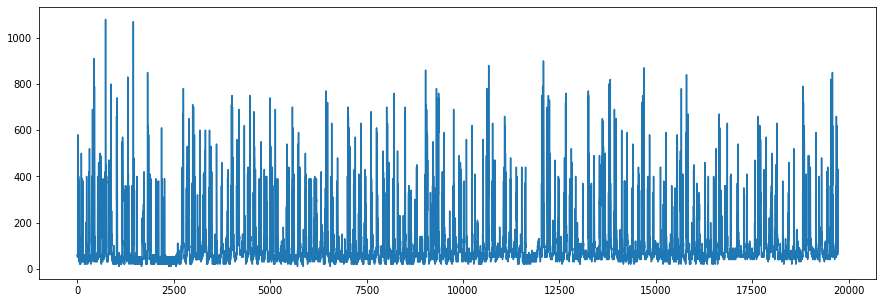

In [6]:
plt.figure(figsize=(15,5))
df['Appliances'].plot();

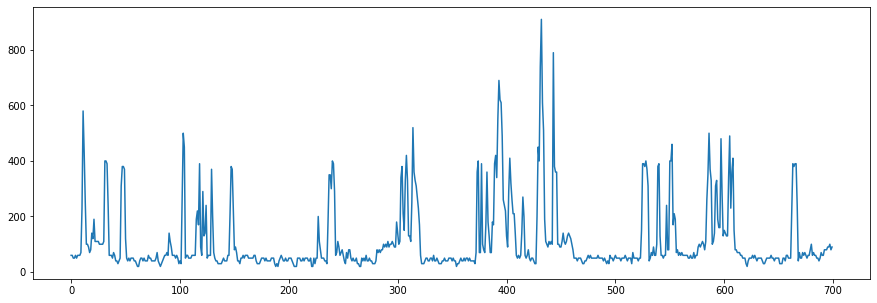

In [7]:
plt.figure(figsize=(15,5))
df['Appliances'].iloc[:700].plot();

In [8]:
import sys
sys.path.append("/home/matheus_cascalho/Documents/Matheus Cascalho/MINDS/TimeSeries_Lab/Testes/Utils")
from analyse import Analyser

In [9]:
an = Analyser(df['Appliances'])

In [10]:
print(an)

A série é estacionária!!
As variâncias das sub-amostras não são iguais



In [11]:
an.stats()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Esp         97.694958
Var      10510.820555
dtype: float64

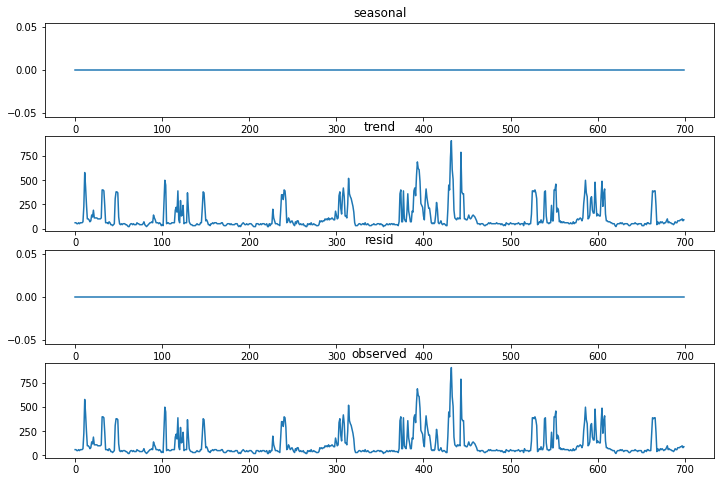

In [12]:
an.plot_decomposition('seasonal', 'trend', 'resid', 'observed', data_range=(0,700));

In [13]:
an.reset(df['Appliances'], freq=6)

In [14]:
an.homoscedasticity()

,Dataset,Levene Statistic,p-value,Result,Cedasticidade
0,DATA,49.427686,2.125429e-12,H0 Rejected,Heterocedástica


In [15]:
print(an)

A série é estacionária!!
As variâncias das sub-amostras não são iguais



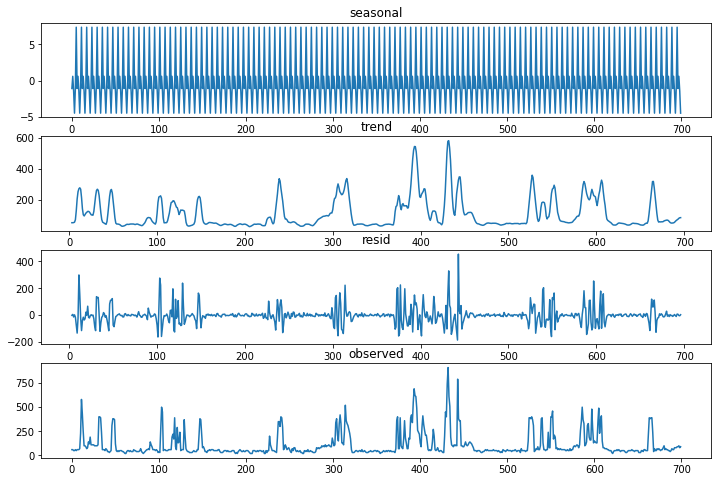

In [16]:
an.plot_decomposition('seasonal', 'trend', 'resid', 'observed', data_range=(0,700));

# Qual o desempenho de um modelo univariado?

In [17]:
from pyFTS.partitioners import Grid

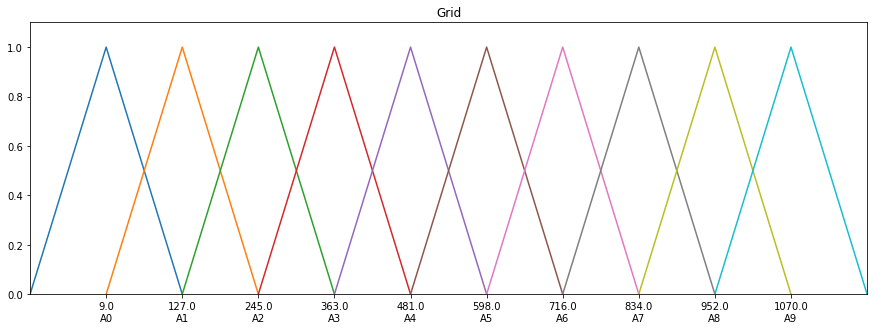

In [18]:
data = df['Appliances']

fs = Grid.GridPartitioner(data=data,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [19]:
fuzzyfied = fs.fuzzyfy(data.values, method='maximum', mode='sets')

In [20]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data.values)
print(model)

Conventional FTS:
A0 -> A0,A1,A2,A3,A4,A5
A1 -> A0,A1,A2,A3,A4,A5,A6,A7
A2 -> A0,A1,A2,A3,A4,A5,A6,A7
A3 -> A0,A1,A2,A3,A4,A5,A6,A7
A4 -> A0,A1,A2,A3,A4,A5,A6,A7,A9
A6 -> A1,A2,A3,A4,A5,A6,A7,A8
A5 -> A1,A2,A3,A4,A5,A6,A7,A9
A7 -> A3,A4,A5,A6,A7
A8 -> A5,A6
A9 -> A6,A7



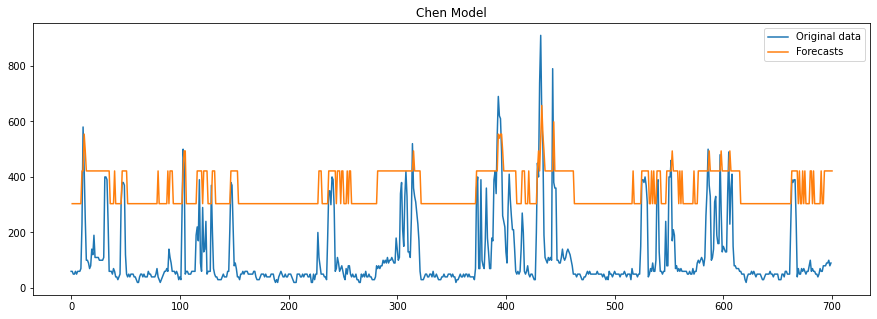

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(data.values[:700])
forecasts.insert(0,None)

plt.plot(data.values[:700], label="Original data")
plt.plot(forecasts, label="Forecasts")
plt.title('Chen Model')
plt.legend();

In [22]:
from pyFTS.models import hofts

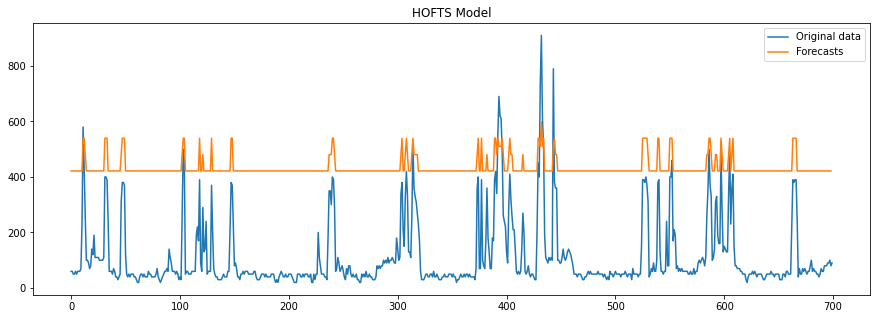

In [23]:
model = hofts.HighOrderFTS(order=1, partitioner=fs)
model.fit(data.values)

forecasts = model.predict(data.values[:700])

plt.figure(figsize=(15,5))
plt.plot(data.values[:700], label="Original data")
plt.plot(forecasts, label="Forecasts")
plt.title('HOFTS Model')
plt.legend();

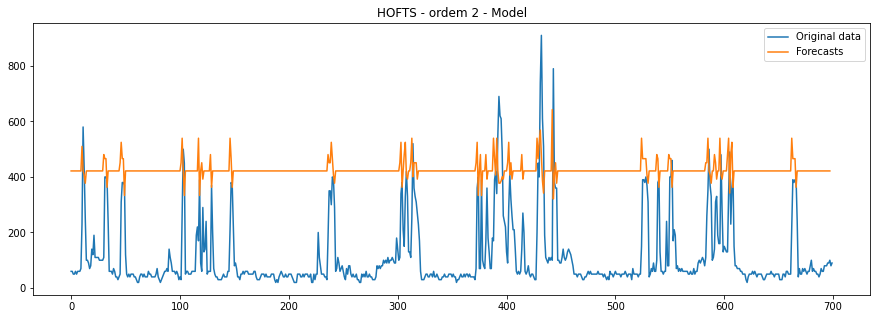

In [24]:
model = hofts.HighOrderFTS(order=2, partitioner=fs)
model.fit(data.values)

forecasts = model.predict(data.values[:700])

plt.figure(figsize=(15,5))
plt.plot(data.values[:700], label="Original data")
plt.plot(forecasts, label="Forecasts")
plt.title('HOFTS - ordem 2 - Model')
plt.legend();

In [25]:
from pyFTS.models import pwfts

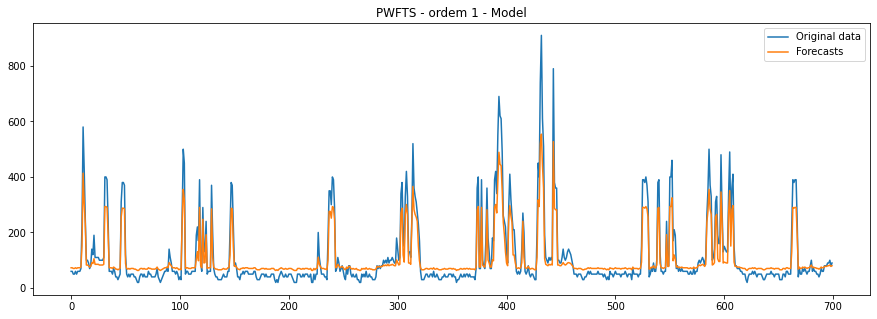

In [26]:
model = pwfts.ProbabilisticWeightedFTS(order=1, partitioner=fs)
model.fit(data.values)

forecasts = model.predict(data.values[:700])

plt.figure(figsize=(15,5))
plt.plot(data.values[:700], label="Original data")
plt.plot(forecasts, label="Forecasts")
plt.title('PWFTS - ordem 1 - Model')
plt.legend();

In [27]:
from pyFTS.benchmarks import Measures

In [28]:
rmse, mape, u = Measures.get_point_statistics(data.values[:700], model)

In [29]:
stats = {
    "rmse": rmse,
    "mape": mape,
    "u": u
}
pd.Series(stats)

rmse    85.44
mape    52.92
u        1.00
dtype: float64

rmse    85.82
mape    49.09
u        1.00
dtype: float64

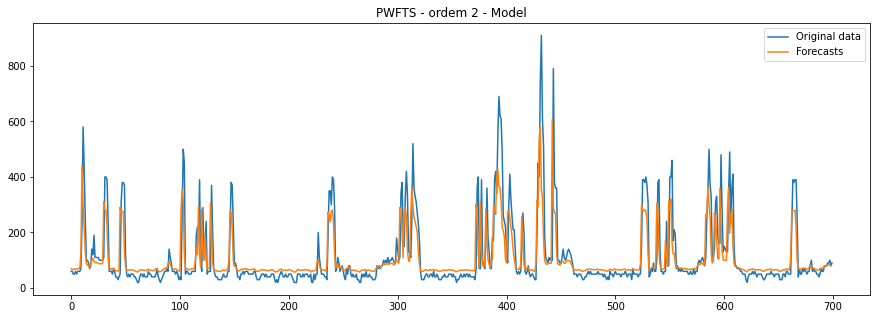

In [30]:
model = pwfts.ProbabilisticWeightedFTS(order=2, partitioner=fs)
model.fit(data.values)

forecasts = model.predict(data.values[:700])

plt.figure(figsize=(15,5))
plt.plot(data.values[:700], label="Original data")
plt.plot(forecasts, label="Forecasts")
plt.title('PWFTS - ordem 2 - Model')
plt.legend();

rmse, mape, u = Measures.get_point_statistics(data.values[:700], model)

stats = {
    "rmse": rmse,
    "mape": mape,
    "u": u
}
pd.Series(stats)

rmse    80.05
mape    39.69
u        0.94
dtype: float64

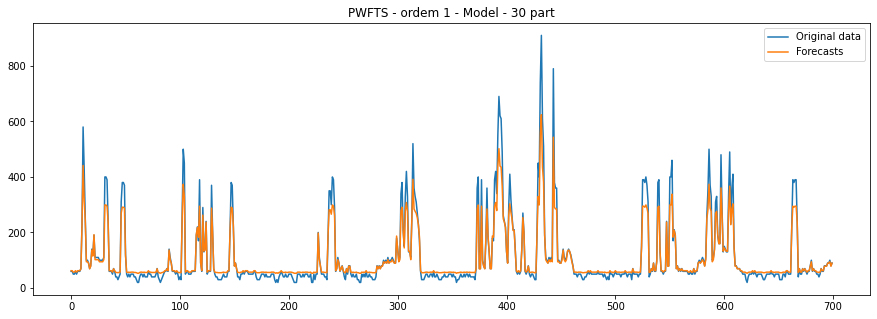

In [31]:
fs = Grid.GridPartitioner(data=data,npart=30)
model = pwfts.ProbabilisticWeightedFTS(order=1, partitioner=fs)
model.fit(data.values)

forecasts = model.predict(data.values[:700])

plt.figure(figsize=(15,5))
plt.plot(data.values[:700], label="Original data")
plt.plot(forecasts, label="Forecasts")
plt.title('PWFTS - ordem 1 - Model - 30 part')
plt.legend();

rmse, mape, u = Measures.get_point_statistics(data.values[:700], model)

stats = {
    "rmse": rmse,
    "mape": mape,
    "u": u
}
pd.Series(stats)

rmse    79.08
mape    37.26
u        0.93
dtype: float64

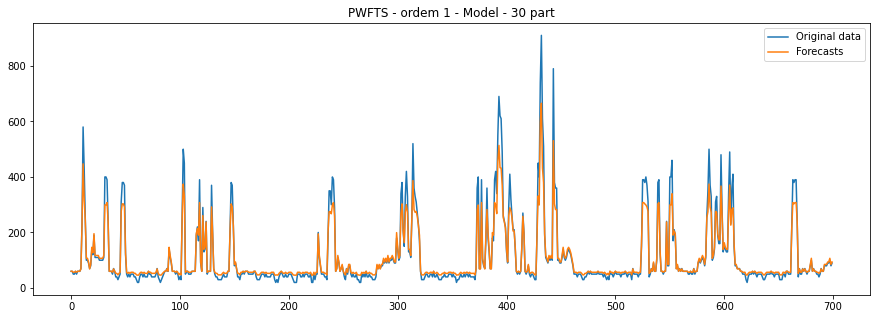

In [32]:
fs = Grid.GridPartitioner(data=data,npart=50)
model = pwfts.ProbabilisticWeightedFTS(order=1, partitioner=fs)
model.fit(data.values)

forecasts = model.predict(data.values[:700])

plt.figure(figsize=(15,5))
plt.plot(data.values[:700], label="Original data")
plt.plot(forecasts, label="Forecasts")
plt.title('PWFTS - ordem 1 - Model - 30 part')
plt.legend();

rmse, mape, u = Measures.get_point_statistics(data.values[:700], model)

stats = {
    "rmse": rmse,
    "mape": mape,
    "u": u
}
pd.Series(stats)

In [33]:
rmses = []
for i in np.arange(30, 200, 10):
    fs = Grid.GridPartitioner(data=data,npart=i)
    model = pwfts.ProbabilisticWeightedFTS(order=1, partitioner=fs)
    model.fit(data.values)

    forecasts = model.predict(data.values[:700])

    r = Measures.get_point_statistics(data.values[:700], model)[0]
    
    rmses.append(r)

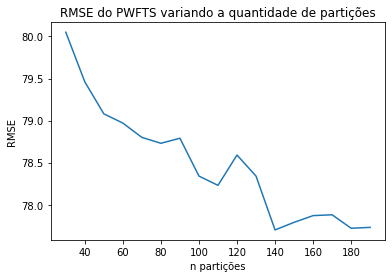

In [34]:
plt.plot(np.arange(30, 200, 10), rmses);
plt.title('RMSE do PWFTS variando a quantidade de partições')
plt.xlabel("n partições")
plt.ylabel("RMSE");

# Testes SOM

In [35]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [36]:
cols = df.columns[2:]
df[cols].loc[0].values

array([ 30.        ,  19.89      ,  47.59666667,  19.2       ,
        44.79      ,  19.79      ,  44.73      ,  19.        ,
        45.56666667,  17.16666667,  55.2       ,   7.02666667,
        84.25666667,  17.2       ,  41.62666667,  18.2       ,
        48.9       ,  17.03333333,  45.53      ,   6.6       ,
       733.5       ,  92.        ,   7.        ,  63.        ,
         5.3       ,  13.27543316,  13.27543316])

In [37]:
import SimpSOM as sps

In [38]:
len_train = round(len(df[cols]) * 0.7)
train = df[cols].values[:len_train]

In [39]:
net = sps.somNet(20,20,train, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


In [40]:
net.train(startLearnRate=0.01, 
          epochs = 10000)

Training SOM... done!


In [41]:
net.save('applianceEnergy_SOM')

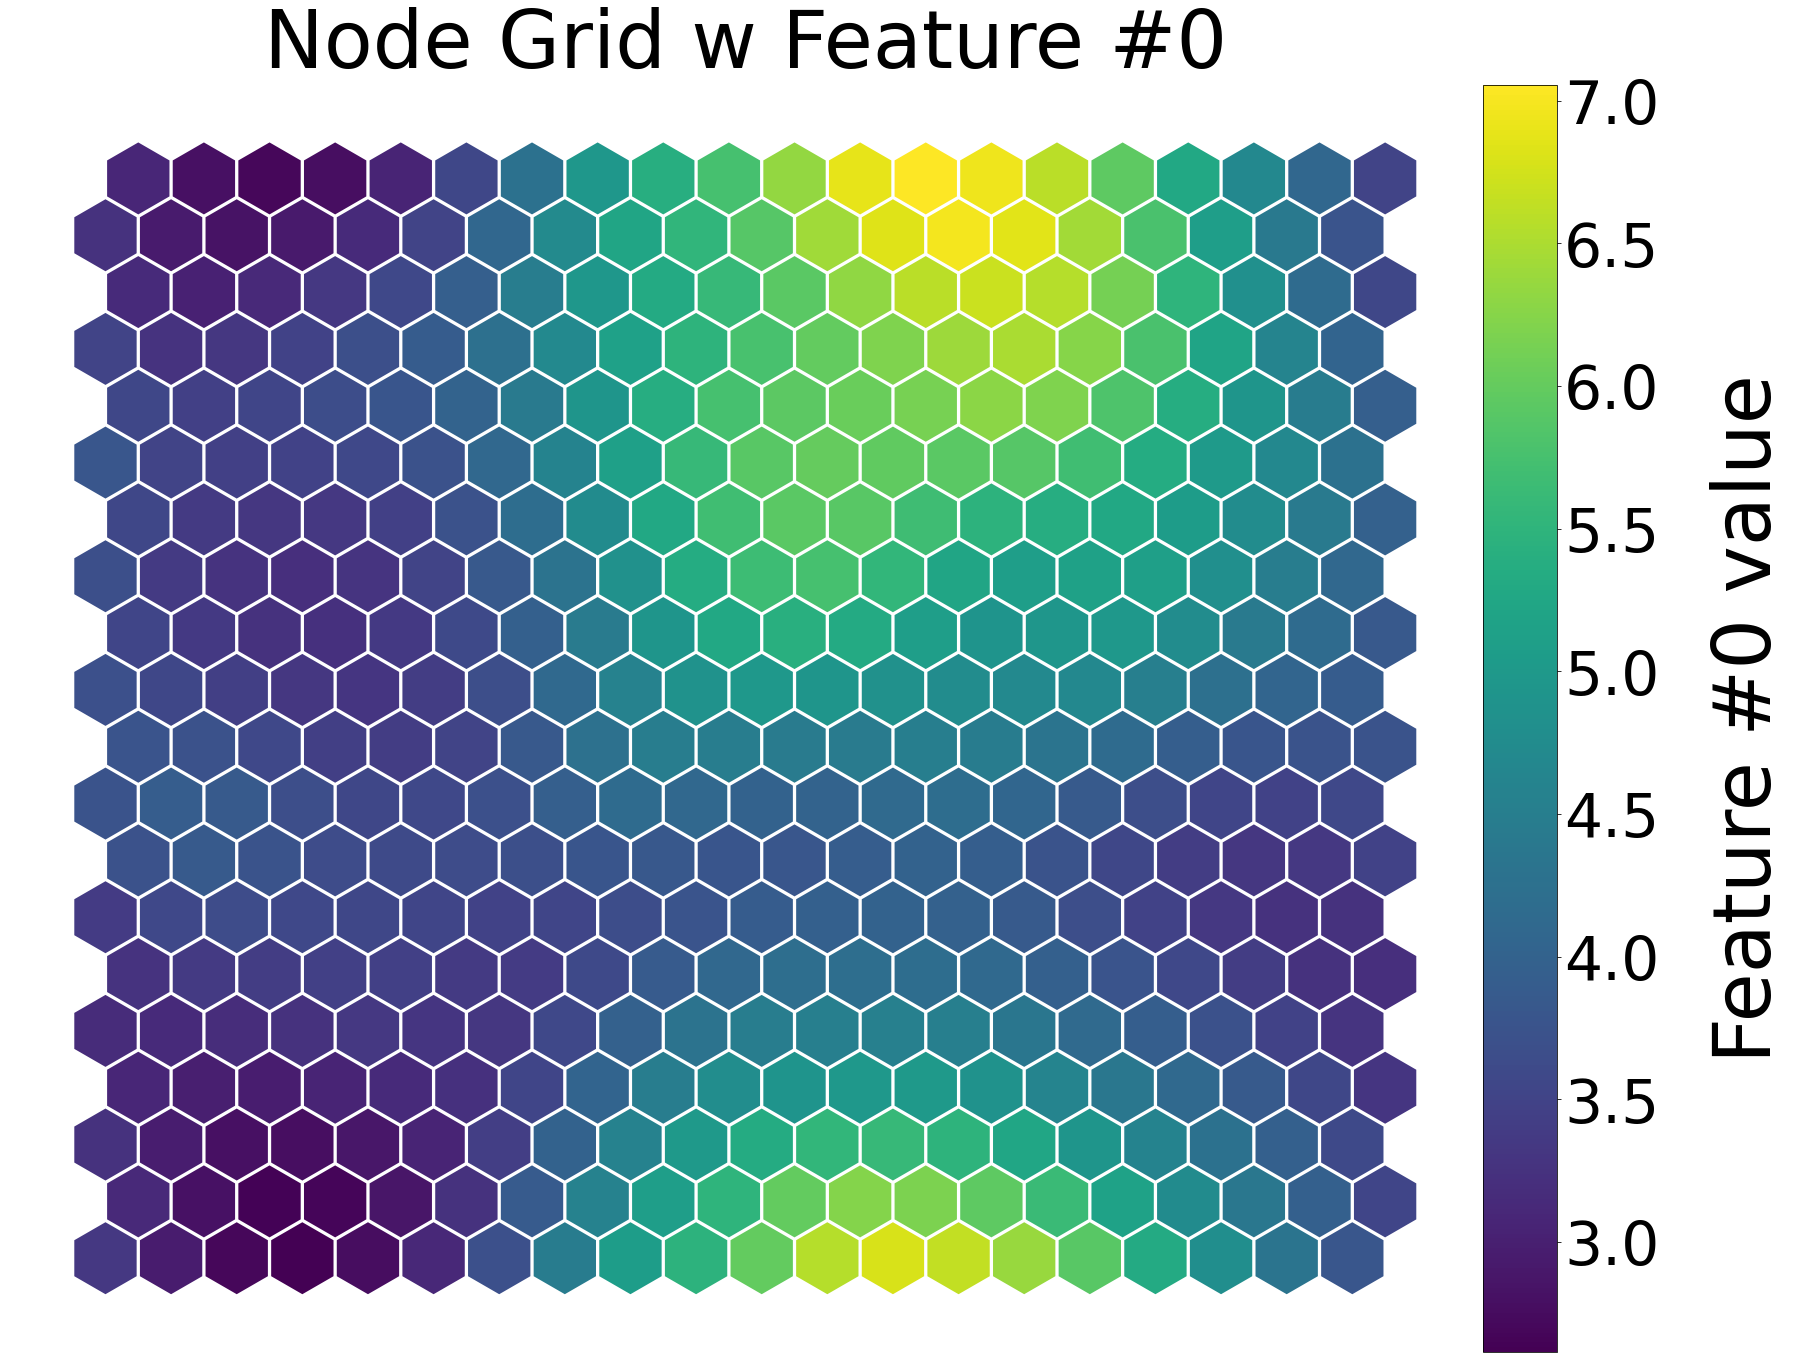

In [42]:
net.nodes_graph(colnum=0)

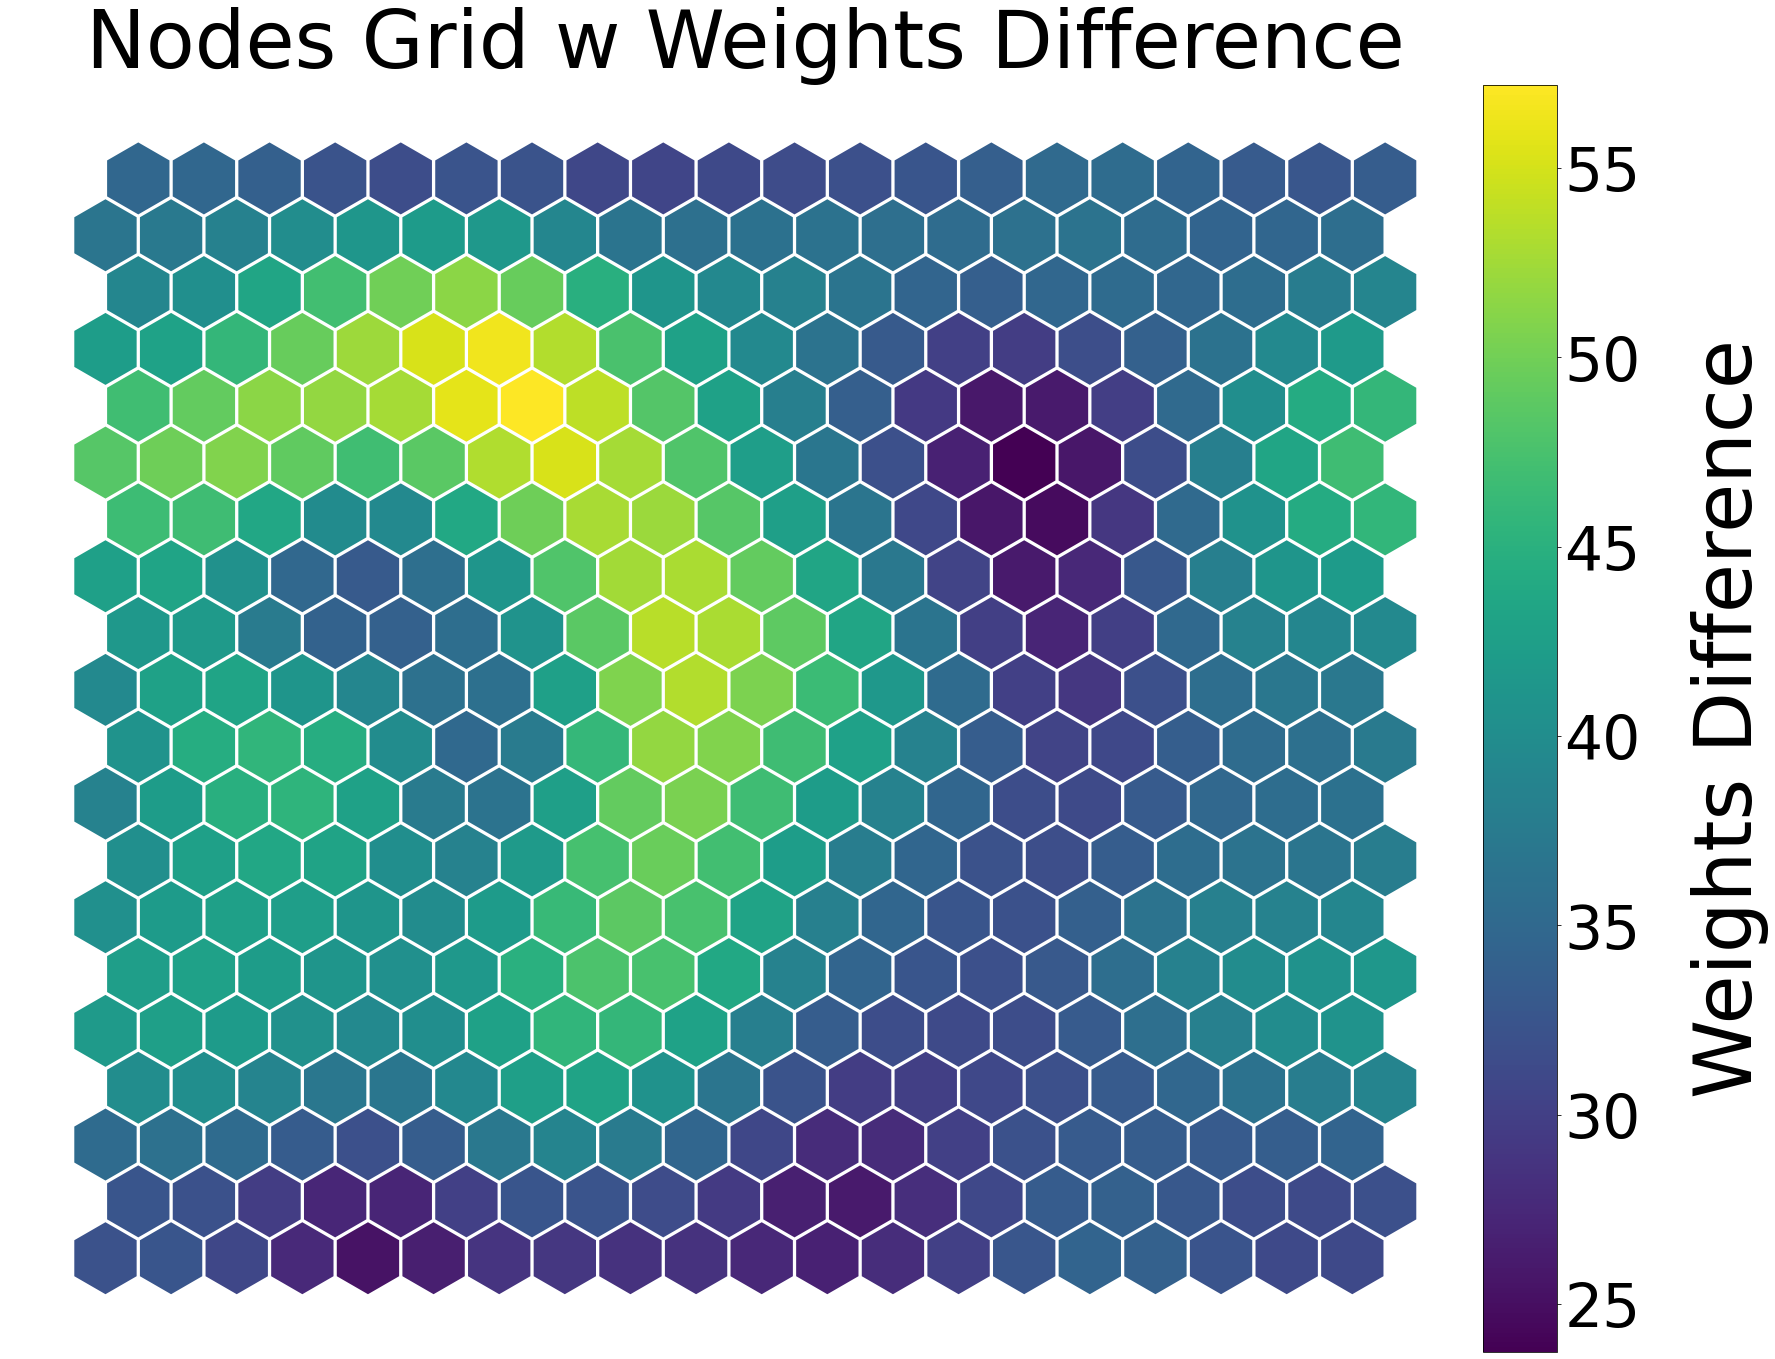

In [43]:
net.diff_graph()

In [44]:
test = df[cols].values[len_train:]

In [45]:
data_2d = net.project(test)

<Figure size 432x288 with 0 Axes>

In [46]:
df_som = pd.DataFrame(data_2d, columns=["x", "y"])

In [47]:
df_som.head()

,x,y
0,6.0,6.928203
1,3.0,6.928203
2,2.5,6.062178
3,3.0,5.196152
4,5.5,4.330127


In [48]:
df_som.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5921 entries, 0 to 5920
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5921 non-null   float64
 1   y       5921 non-null   float64
dtypes: float64(2)
memory usage: 92.6 KB


In [49]:
df_som['Appliances'] = df['Appliances'][len_train:].values

In [50]:
df_som.head()

,x,y,Appliances
0,6.0,6.928203,120
1,3.0,6.928203,150
2,2.5,6.062178,100
3,3.0,5.196152,110
4,5.5,4.330127,230


In [51]:
from pyFTS.models.multivariate import wmvfts

In [52]:
from pyFTS.models.multivariate import variable

In [53]:
x = variable.Variable("x", 
                      data_label="x", 
                      partitioner=Grid.GridPartitioner,
                      npart=50, 
                      data=df_som)

In [54]:
y = variable.Variable("y", 
                      data_label="y", 
                      partitioner=Grid.GridPartitioner,
                      npart=50, 
                      data=df_som)

appliance = variable.Variable("appliance", 
                              data_label="Appliances", 
                              partitioner=Grid.GridPartitioner,
                              npart=50, 
                              data=df_som)

In [55]:
model = wmvfts.WeightedMVFTS(explanatory_variables=[x, y, appliance], 
                             target_variable=appliance)

In [56]:
model.fit(df_som[:-700])

In [57]:
forecast = model.predict(df_som.iloc[-700:])

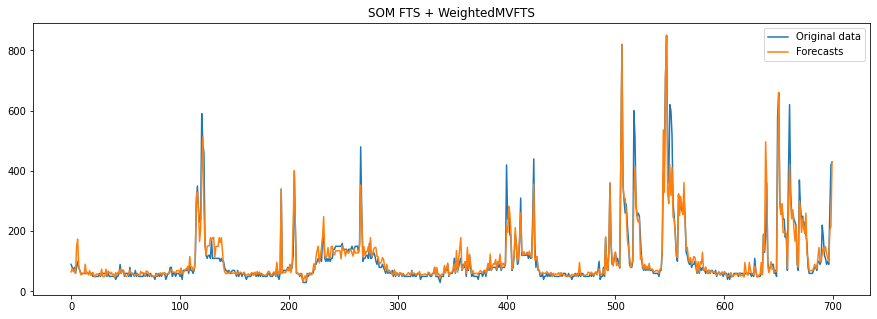

In [58]:
plt.figure(figsize=(15,5))
plt.plot(df_som['Appliances'].values[-700:], label="Original data")
plt.plot(forecast, label="Forecasts")
plt.title('SOM FTS + ' + model.shortname)
plt.legend();

In [59]:
rmse, mape, u = Measures.get_point_statistics(df_som, model)

stats = {
    "rmse": rmse,
    "mape": mape,
    "u": u
}
pd.Series(stats)

rmse    51.88
mape    21.50
u        0.78
dtype: float64

In [68]:
rmses = []
for i in np.arange(50, 200, 10):
    x = variable.Variable("x", 
                      data_label="x", 
                      partitioner=Grid.GridPartitioner,
                      npart=i, 
                      data=df_som)
    y = variable.Variable("y", 
                      data_label="y", 
                      partitioner=Grid.GridPartitioner,
                      npart=i, 
                      data=df_som)
    appliance = variable.Variable("appliance", 
                              data_label="Appliances", 
                              partitioner=Grid.GridPartitioner,
                              npart=i, 
                              data=df_som)
    
    model = wmvfts.WeightedMVFTS(explanatory_variables=[x, y, appliance], 
                                 target_variable=appliance)
    model.fit(df_som[:-700])

    forecast = model.predict(df_som.iloc[-700:])
    
    r = Measures.get_point_statistics(df_som, model)[0]
    
    rmses.append(r)

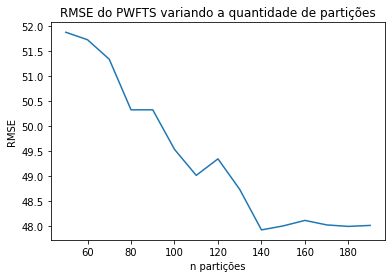

In [72]:
plt.plot(np.arange(50, 200, 10), rmses);
plt.title('RMSE do PWFTS variando a quantidade de partições')
plt.xlabel("n partições")
plt.ylabel("RMSE");

In [64]:
i = 200

x = variable.Variable("x", 
                      data_label="x", 
                      partitioner=Grid.GridPartitioner,
                      npart=i, 
                      data=df_som)
y = variable.Variable("y", 
                  data_label="y", 
                  partitioner=Grid.GridPartitioner,
                  npart=i, 
                  data=df_som)
appliance = variable.Variable("appliance", 
                          data_label="Appliances", 
                          partitioner=Grid.GridPartitioner,
                          npart=i, 
                          data=df_som)

model = wmvfts.WeightedMVFTS(explanatory_variables=[x, y, appliance], 
                             target_variable=appliance)
model.fit(df_som[:-700])

forecast = model.predict(df_som.iloc[-700:])

r = Measures.get_point_statistics(df_som, model)[0]

In [66]:
i = 400

x = variable.Variable("x", 
                      data_label="x", 
                      partitioner=Grid.GridPartitioner,
                      npart=i, 
                      data=df_som)
y = variable.Variable("y", 
                  data_label="y", 
                  partitioner=Grid.GridPartitioner,
                  npart=i, 
                  data=df_som)
appliance = variable.Variable("appliance", 
                          data_label="Appliances", 
                          partitioner=Grid.GridPartitioner,
                          npart=i, 
                          data=df_som)

model = wmvfts.WeightedMVFTS(explanatory_variables=[x, y, appliance], 
                             target_variable=appliance)
model.fit(df_som[:-700])

forecast = model.predict(df_som.iloc[-700:])

r = Measures.get_point_statistics(df_som, model)[0]